In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
print (tf.__version__)

2.0.0-rc1


In [3]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
print (x_train_scaled.shape)

K = len(set(y_train.flatten()))
print (K)

(50000, 32, 32, 3)
10


In [15]:
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [16]:
vgg = VGG16(input_shape=[32,32,3],
          weights='imagenet',
         include_top=False)
vgg.trainable=False
# map the data into feature vectors
x = Flatten()(vgg.output)
print (x.shape)
x = Dense(200, activation='relu')(x)
o = Dense(K, activation='softmax')(x)

model = Model(vgg.input,o)
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

(None, 512)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128) 

In [17]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 176s 4ms/sample - loss: 1.3785 - accuracy: 0.5173 - val_loss: 1.2500 - val_accuracy: 0.5643
Epoch 2/10
40000/40000 [==============================] - 175s 4ms/sample - loss: 1.1913 - accuracy: 0.5831 - val_loss: 1.2009 - val_accuracy: 0.5750
Epoch 3/10
40000/40000 [==============================] - 178s 4ms/sample - loss: 1.1283 - accuracy: 0.6055 - val_loss: 1.2050 - val_accuracy: 0.5786
Epoch 4/10
 9120/40000 [=====>........................] - ETA: 1:50 - loss: 1.0893 - accuracy: 0.6196

KeyboardInterrupt: 

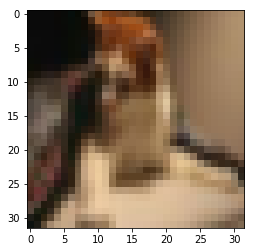

predicted label is: 3
actual label is: [3]


In [30]:
import matplotlib.pyplot as plt

imgNum = np.random.randint(0,1000)
plt.imshow(x_test_scaled[imgNum])
plt.show()

tstimg = x_test_scaled[imgNum].reshape(1,32, 32, 3)
predlbl = model.predict(tstimg)
print ('predicted label is:', predlbl.argmax())
print ('actual label is:',y_test[imgNum])